### Anisotropic Filter


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
gray_image = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)

### Difusión Anisotrópica

La función `anisotropic_diffusion` implementa un proceso de **difusión anisotrópica** que permite suavizar una imagen mientras preserva sus bordes. Este método es útil para reducir el ruido sin afectar significativamente las estructuras importantes de la imagen, como los contornos de los objetos.

En cada iteración, el algoritmo calcula gradientes (diferencias) en las cuatro direcciones principales (norte, sur, este y oeste). Basado en estos gradientes y el parámetro de sensibilidad `kappa`, se calcula una función de borde que determina cuánto suavizar en cada dirección.



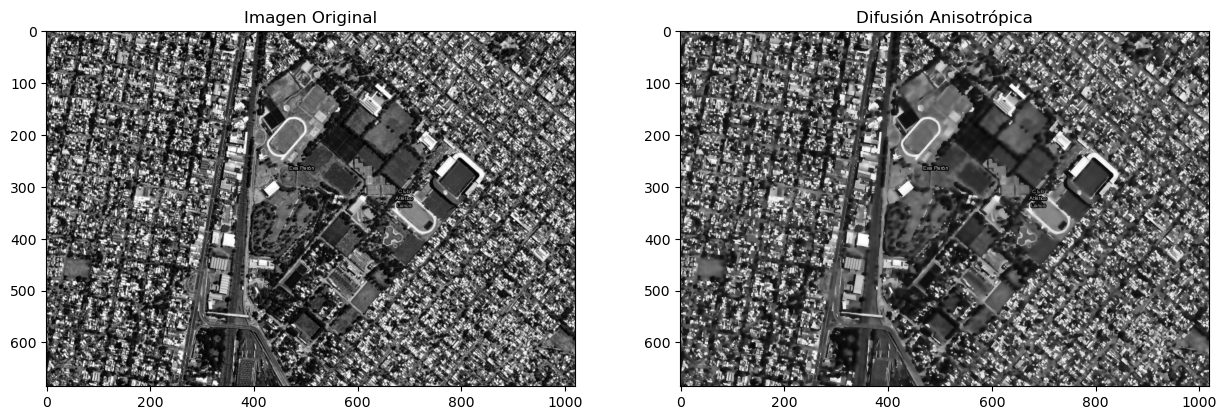

In [10]:
def anisotropic_diffusion(img, num_iterations=10, kappa=50, gamma=0.1, option=1):
    """
    Implementación de la difusión anisotrópica.
    
    :param img: Imagen de entrada en escala de grises
    :param num_iterations: Número de iteraciones para el proceso de difusión
    :param kappa: Parámetro de sensibilidad a los bordes
    :param gamma: Parámetro de paso temporal (debe ser menor a 0.25 para estabilidad)
    :param option: Tipo de función de borde (1 para función exponencial, 2 para función inversa)
    :return: Imagen procesada después de la difusión anisotrópica
    """
    img = img.astype(np.float32)

    for i in range(num_iterations):
        # Calcular gradientes en cuatro direcciones
        north = np.roll(img, -1, axis=0) - img
        south = np.roll(img, 1, axis=0) - img
        east = np.roll(img, -1, axis=1) - img
        west = np.roll(img, 1, axis=1) - img

        # Función de borde para cada dirección
        if option == 1:
            c_north = np.exp(-(north / kappa) ** 2)
            c_south = np.exp(-(south / kappa) ** 2)
            c_east = np.exp(-(east / kappa) ** 2)
            c_west = np.exp(-(west / kappa) ** 2)
        elif option == 2:
            c_north = 1 / (1 + (north / kappa) ** 2)
            c_south = 1 / (1 + (south / kappa) ** 2)
            c_east = 1 / (1 + (east / kappa) ** 2)
            c_west = 1 / (1 + (west / kappa) ** 2)

        # Actualización de la imagen en base a la difusión anisotrópica
        img += gamma * (c_north * north + c_south * south + c_east * east + c_west * west)

    return img.astype(np.uint8)

# Aplicar la difusión anisotrópica
diffused_img = anisotropic_diffusion(img, num_iterations=15, kappa=30, gamma=0.15, option=1)

# Mostrar la imagen original y la imagen procesada
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(diffused_img, cmap='gray')
plt.title('Difusión Anisotrópica')

plt.show()


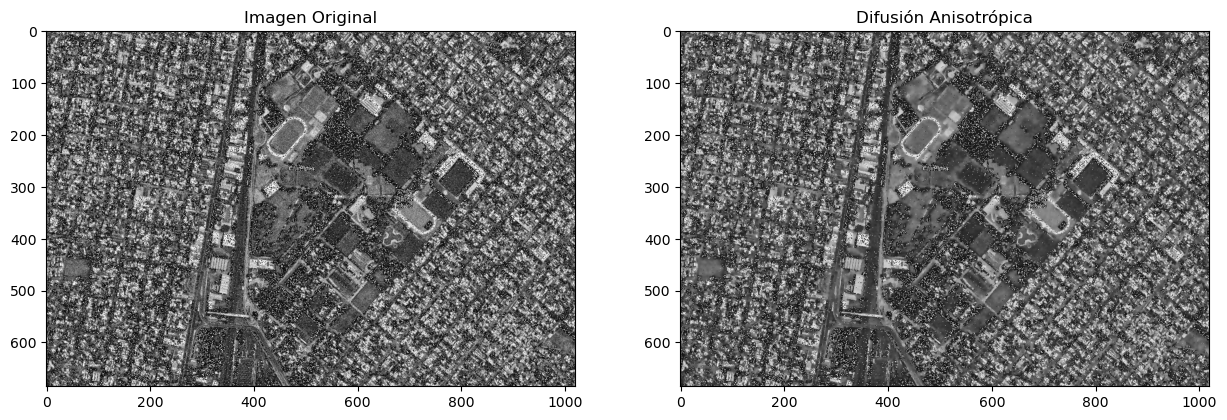

In [19]:
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(gray_image, 0, 25, 70)


def anisotropic_diffusion(img, num_iterations=10, kappa=50, gamma=0.1, option=1):
    """
    Implementación de la difusión anisotrópica.
    
    :param img: Imagen de entrada en escala de grises
    :param num_iterations: Número de iteraciones para el proceso de difusión
    :param kappa: Parámetro de sensibilidad a los bordes
    :param gamma: Parámetro de paso temporal (debe ser menor a 0.25 para estabilidad)
    :param option: Tipo de función de borde (1 para función exponencial, 2 para función inversa)
    :return: Imagen procesada después de la difusión anisotrópica
    """
    img = img.astype(np.float32)

    for i in range(num_iterations):
        # Calcular gradientes en cuatro direcciones
        north = np.roll(img, -1, axis=0) - img
        south = np.roll(img, 1, axis=0) - img
        east = np.roll(img, -1, axis=1) - img
        west = np.roll(img, 1, axis=1) - img

        # Función de borde para cada dirección
        if option == 1:
            c_north = np.exp(-(north / kappa) ** 2)
            c_south = np.exp(-(south / kappa) ** 2)
            c_east = np.exp(-(east / kappa) ** 2)
            c_west = np.exp(-(west / kappa) ** 2)
        elif option == 2:
            c_north = 1 / (1 + (north / kappa) ** 2)
            c_south = 1 / (1 + (south / kappa) ** 2)
            c_east = 1 / (1 + (east / kappa) ** 2)
            c_west = 1 / (1 + (west / kappa) ** 2)

        # Actualización de la imagen en base a la difusión anisotrópica
        img += gamma * (c_north * north + c_south * south + c_east * east + c_west * west)

    return img.astype(np.uint8)

# Aplicar la difusión anisotrópica
diffused_img = anisotropic_diffusion(imagen_ruido_gaussiano, num_iterations=15, kappa=30, gamma=0.15, option=1)

# Mostrar la imagen original y la imagen procesada
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_ruido_gaussiano, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(diffused_img, cmap='gray')
plt.title('Difusión Anisotrópica')

plt.show()

Conlcusion: 

La imagen resultante después de la difusión anisotrópica muestra una reducción del ruido y una mayor suavidad en las áreas homogéneas. Sin embargo, los bordes de las estructuras (por ejemplo, la cancha y las calles) se conservan, lo que permite que los contornos se mantengan definidos a pesar de la reducción de ruido. 